In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

### Data Loading and Basic Understanding

In [24]:
df=pd.read_csv("Cars Dataset.csv")

In [25]:
df.shape

(12076, 10)

In [26]:
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'CONDITION', 'TRANSMISSION', 'CYLINDERS',
       'FUEL', 'ODOMETER', 'ENGINE POWER', 'MILAGE'],
      dtype='object')

In [27]:
df.dtypes

YEAR             int64
MAKE            object
MODEL           object
CONDITION       object
TRANSMISSION    object
CYLINDERS        int64
FUEL            object
ODOMETER         int64
ENGINE POWER    object
MILAGE           int64
dtype: object

In [28]:
df.head()

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE
0,2011,chevrolet,camaro,Excellent,Automatic,6,gas,12200,Avg CC,6
1,2012,chrysler,town & country,Excellent,Manual,6,gas,111000,Low CC,11
2,2009,jeep,liberty,Excellent,Manual,6,gas,68650,Low CC,49
3,2011,buick,lacrosse,Excellent,Manual,6,gas,123562,High CC,40
4,2008,chevrolet,cobalt,Excellent,Automatic,4,gas,138001,Avg CC,33


### Data Quality Check & Missing Values

In [29]:
df.isnull().sum()

YEAR            0
MAKE            0
MODEL           0
CONDITION       0
TRANSMISSION    0
CYLINDERS       0
FUEL            0
ODOMETER        0
ENGINE POWER    0
MILAGE          0
dtype: int64

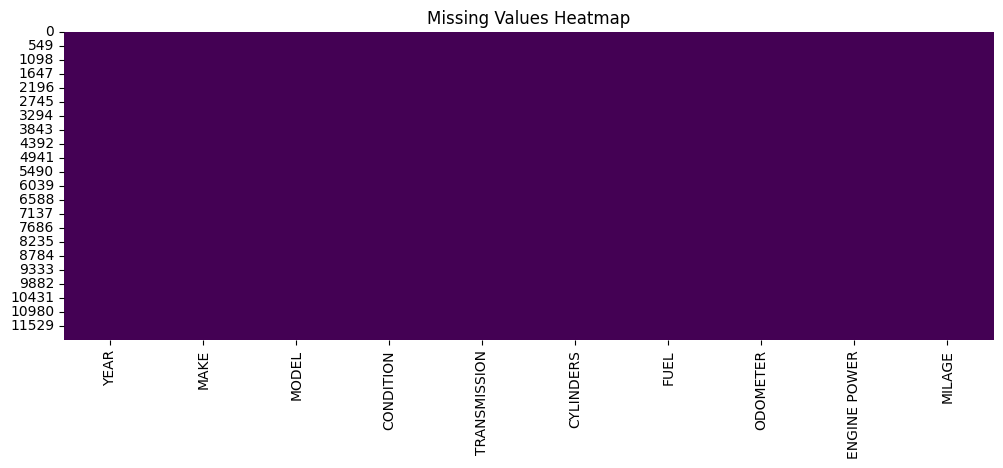

In [30]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [31]:
df.duplicated().sum()

np.int64(39)

In [32]:
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())


,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE
10808,2008,ram,4500,Excellent,Automatic,6,diesel,65264,Low CC,14
12002,2008,ram,4500,Excellent,Automatic,6,diesel,65264,Low CC,14
8322,2011,ford,f-350 super duty lariat li,Excellent,Automatic,8,diesel,94844,Low CC,16
11580,2011,ford,f-350 super duty lariat li,Excellent,Automatic,8,diesel,94844,Low CC,16
8613,2011,ford,f350,Excellent,Automatic,8,diesel,182028,Low CC,37
...,...,...,...,...,...,...,...,...,...,...
10517,2017,nissan,titan,Excellent,Automatic,8,gas,12940,Low CC,30
10190,2018,jeep,grand cherokee,Excellent,Manual,6,gas,16812,Low CC,36
10661,2018,jeep,grand cherokee,Excellent,Manual,6,gas,16812,Low CC,36
10248,2018,ram,2500,Excellent,Automatic,8,gas,9930,Low CC,33


In [33]:
df.drop_duplicates()

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE
0,2011,chevrolet,camaro,Excellent,Automatic,6,gas,12200,Avg CC,6
1,2012,chrysler,town & country,Excellent,Manual,6,gas,111000,Low CC,11
2,2009,jeep,liberty,Excellent,Manual,6,gas,68650,Low CC,49
3,2011,buick,lacrosse,Excellent,Manual,6,gas,123562,High CC,40
4,2008,chevrolet,cobalt,Excellent,Automatic,4,gas,138001,Avg CC,33
...,...,...,...,...,...,...,...,...,...,...
12071,2015,chevrolet,silverado,Excellent,Manual,8,diesel,170781,Low CC,48
12072,2018,toyota,tacoma,Excellent,Automatic,6,gas,9561,Low CC,37
12073,2017,ford,f-250 sd,Excellent,Manual,8,diesel,125780,Low CC,33
12074,2017,ram,1500 crew cab,Excellent,Manual,8,gas,21141,Low CC,37


### Numerical Feature Analysis

In [34]:
df[['YEAR', 'CYLINDERS', 'ODOMETER', 'MILAGE']].describe()

,YEAR,CYLINDERS,ODOMETER,MILAGE
count,12076.000000,12076.000000,12076.000000,12076.000000
mean,2010.063183,6.427708,94208.968367,27.543557
std,9.202758,1.523097,61173.220056,13.202121
min,1927.000000,4.000000,0.000000,5.000000
25%,2007.000000,6.000000,44299.500000,16.000000
50%,2012.000000,6.000000,88495.000000,28.000000
75%,2015.000000,8.000000,131903.000000,39.000000
max,2020.000000,8.000000,469000.000000,50.000000


In [35]:
numeric_cols = ['YEAR', 'CYLINDERS', 'ODOMETER', 'MILAGE']

for col in numeric_cols:
    print(f"Skewness of {col}: {df[col].skew()}")

Skewness of YEAR: -3.751412536931528
Skewness of CYLINDERS: -0.37359127402543996
Skewness of ODOMETER: 0.7397325398300347
Skewness of MILAGE: -0.004556504584077811


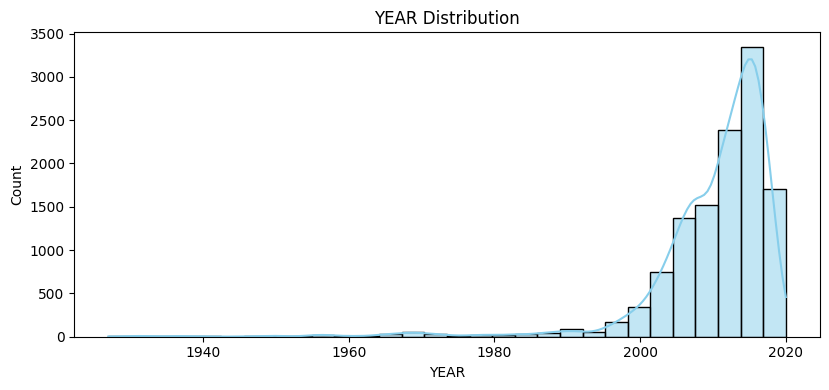

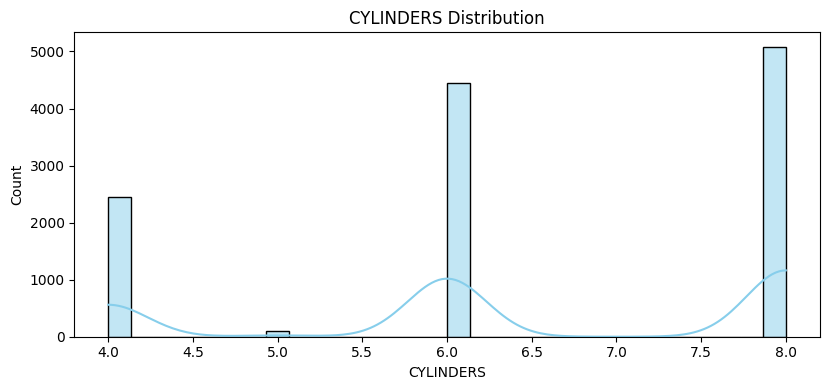

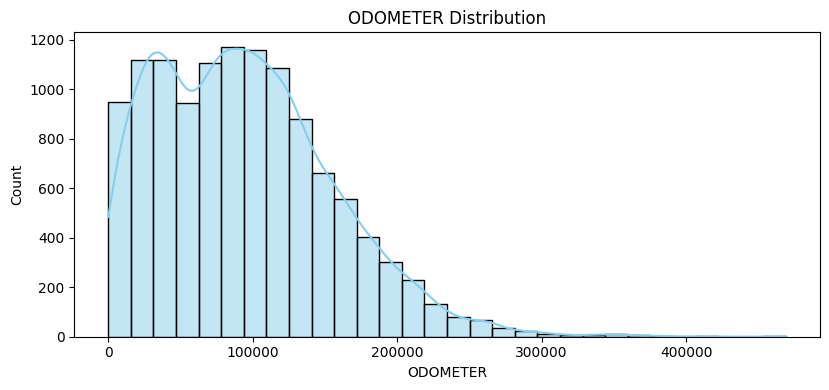

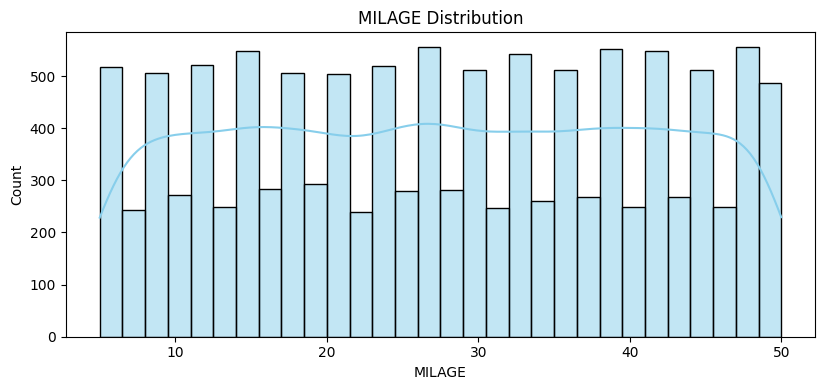

In [36]:
numeric_cols = ['YEAR', 'CYLINDERS', 'ODOMETER', 'MILAGE']

for col in numeric_cols:
    plt.figure(figsize=(16,4))
   
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    
    
    plt.tight_layout()
    plt.show()


### Categorical Feature Analysis

In [37]:
df[[ 'MAKE', 'MODEL', 'CONDITION', 'TRANSMISSION','FUEL', 'ENGINE POWER']].describe()

,MAKE,MODEL,CONDITION,TRANSMISSION,FUEL,ENGINE POWER
count,12076,12076,12076,12076,12076,12076
unique,39,3076,2,2,2,3
top,ford,f-150,Excellent,Automatic,gas,Low CC
freq,2792,336,11803,7238,10269,8670


Categorical columns: ['MAKE', 'MODEL', 'CONDITION', 'TRANSMISSION', 'FUEL', 'ENGINE POWER']

Column: MAKE
MAKE
ford         2792
chevrolet    2143
ram          1003
toyota        791
gmc           713
jeep          520
nissan        441
dodge         429
honda         414
bmw           269
Name: count, dtype: int64


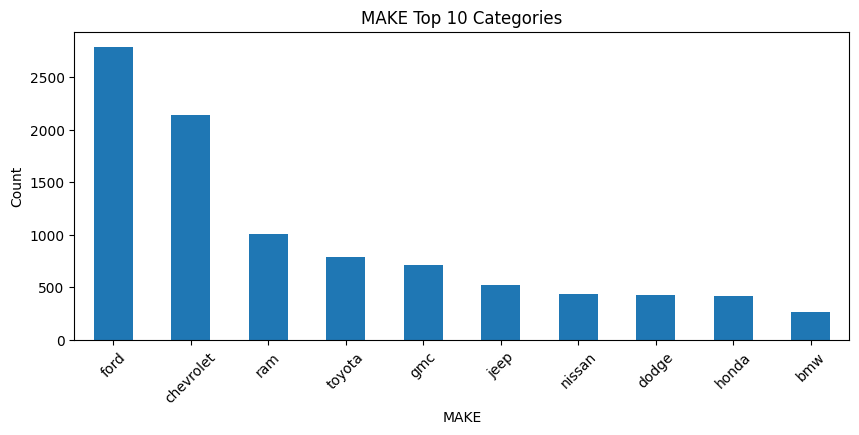


Column: MODEL
MODEL
f-150               336
2500                326
silverado 1500      321
1500                207
3500                150
silverado 2500hd    145
sierra 1500         128
f-250 sd            118
tacoma              115
silverado           111
Name: count, dtype: int64


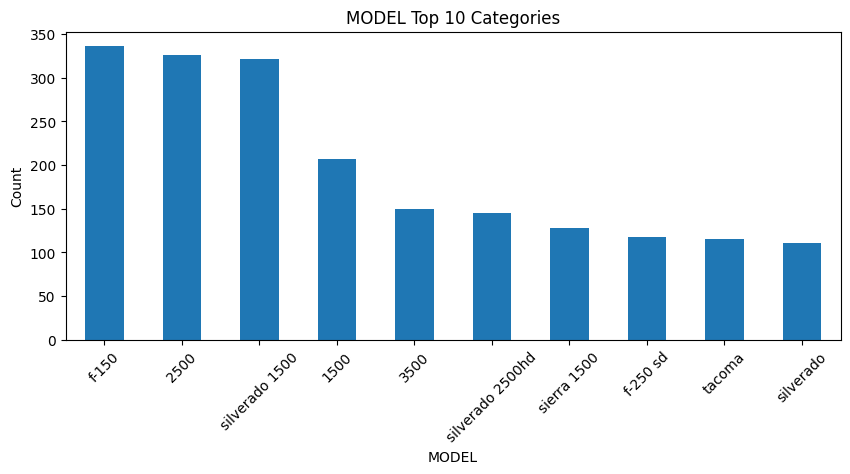


Column: CONDITION
CONDITION
Excellent    11803
salvage        273
Name: count, dtype: int64


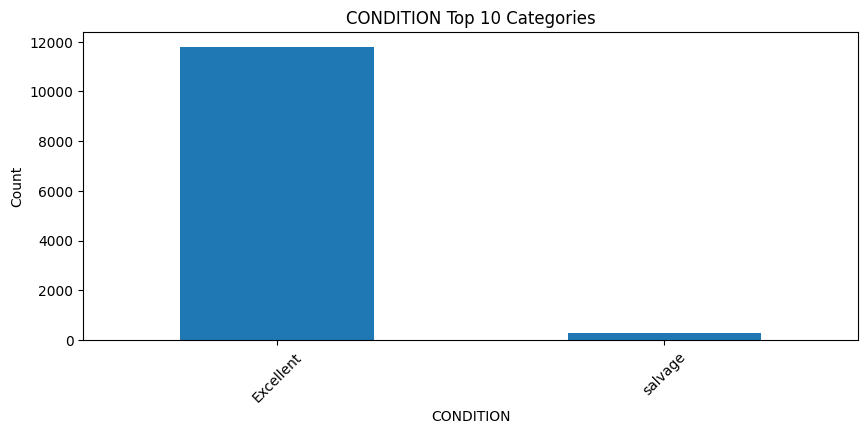


Column: TRANSMISSION
TRANSMISSION
Automatic    7238
Manual       4838
Name: count, dtype: int64


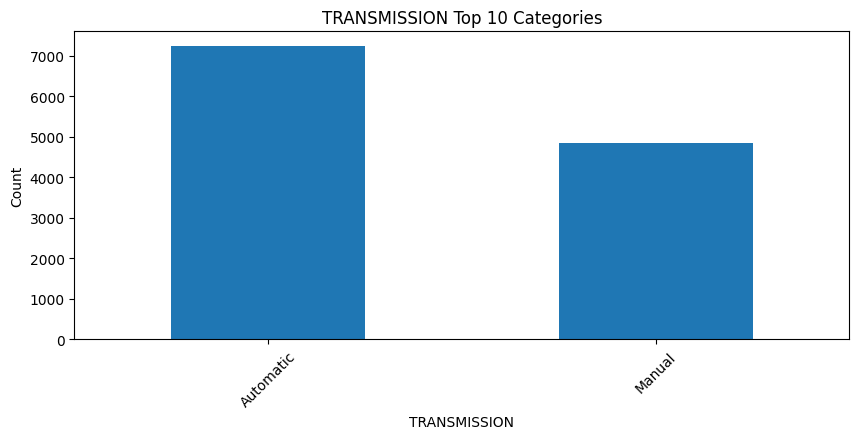


Column: FUEL
FUEL
gas       10269
diesel     1807
Name: count, dtype: int64


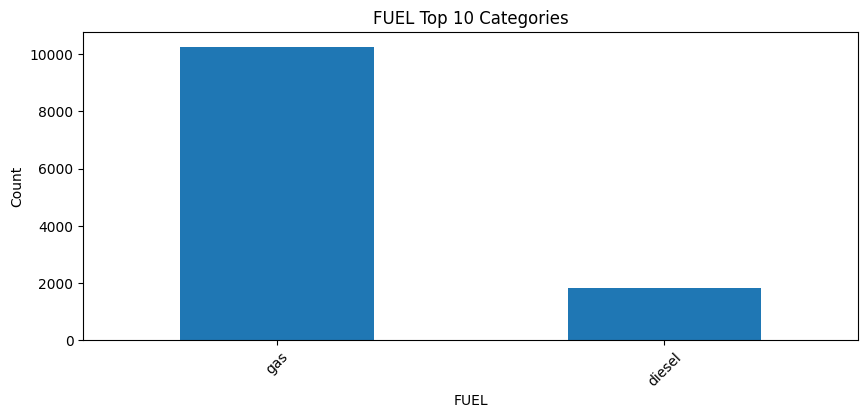


Column: ENGINE POWER
ENGINE POWER
Low CC     8670
Avg CC     2268
High CC    1138
Name: count, dtype: int64


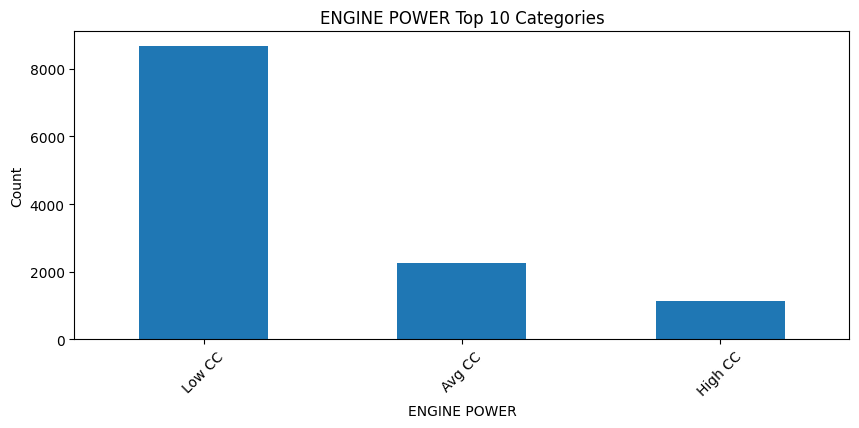

In [ ]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categorical columns:", cat_cols)

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))  
    
    top_values = df[col].value_counts().head(10)
    
    plt.figure(figsize=(10,4))
    top_values.plot(kind='bar')  
    plt.title(f"{col} Top 10 Categories")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

### Correlation

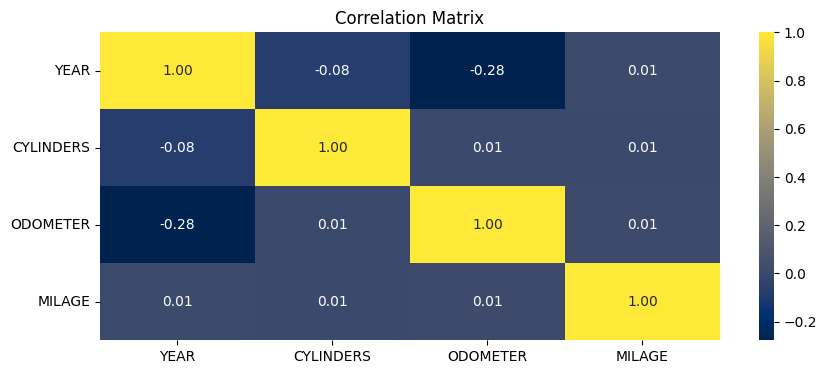

In [39]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, cmap="cividis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Feature engineering

In [40]:
from datetime import datetime    
    
current_year=datetime.now().year
df['Age'] = current_year - df['YEAR']
print("Age column added based on YEAR.")
df[['MAKE','MODEL','YEAR', 'Age']].head()

Age column added based on YEAR.


,MAKE,MODEL,YEAR,Age
0,chevrolet,camaro,2011,14
1,chrysler,town & country,2012,13
2,jeep,liberty,2009,16
3,buick,lacrosse,2011,14
4,chevrolet,cobalt,2008,17


In [41]:
df["Mileage_per_Odometer"] = df["MILAGE"] / (df["ODOMETER"] + 1)
df_sorted = df.sort_values(by="Mileage_per_Odometer", ascending=False)
df_sorted.head(10)



,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Age,Mileage_per_Odometer
5260,2008,ford,ranger,Excellent,Automatic,4,gas,0,Low CC,46,17,46.0
2467,2008,gmc,sierra 2500hd,Excellent,Manual,8,diesel,0,Low CC,45,17,45.0
7643,2001,ford,f-150,Excellent,Manual,8,gas,0,Low CC,43,24,43.0
4971,2001,ford,2001,Excellent,Automatic,8,gas,0,High CC,42,24,42.0
2336,1989,ford,mustang,Excellent,Automatic,8,gas,0,Low CC,42,36,42.0
6779,2013,chevrolet,camaro,Excellent,Automatic,6,gas,0,Low CC,41,12,41.0
5118,2003,gmc,sierra 1500,Excellent,Automatic,8,gas,0,High CC,38,22,38.0
7692,2004,chevrolet,trailblazer,Excellent,Manual,6,gas,0,Low CC,37,21,37.0
4976,2006,ram,2500,Excellent,Automatic,6,diesel,0,High CC,36,19,36.0
10341,2015,ford,super duty f-250,Excellent,Manual,8,diesel,0,Low CC,32,10,32.0


In [42]:
df_sorted.tail(10)

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Age,Mileage_per_Odometer
5160,2005,honda,odyssey ex,salvage,Manual,4,gas,233436,High CC,5,20,0.000021
6578,1989,toyota,land cruiser,Excellent,Automatic,6,gas,235000,Low CC,5,36,0.000021
5840,2002,ford,e250 4.2l v6,Excellent,Manual,4,gas,245000,Low CC,5,23,0.000020
5773,1994,mini,van,salvage,Automatic,6,gas,300100,Low CC,6,31,0.000020
6135,2007,chevrolet,silverado 2500hd,Excellent,Manual,8,diesel,251116,Low CC,5,18,0.000020
4709,2004,ford,f-250 sd,Excellent,Automatic,8,gas,251138,Low CC,5,21,0.000020
7427,2001,ford,f350,Excellent,Manual,8,diesel,264424,Low CC,5,24,0.000019
1980,1999,ford,350 power-stroke,Excellent,Automatic,8,diesel,274437,Avg CC,5,26,0.000018
10,2006,ford,f250 super duty,Excellent,Automatic,8,diesel,335044,Low CC,6,19,0.000018
7084,2004,ford,f-150,Excellent,Automatic,8,gas,317837,Low CC,5,21,0.000016


In [43]:
cat_cols = ["CONDITION", "TRANSMISSION", "FUEL","ENGINE POWER"]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()


,YEAR,MAKE,MODEL,CYLINDERS,ODOMETER,MILAGE,Age,Mileage_per_Odometer,CONDITION_salvage,TRANSMISSION_Manual,FUEL_gas,ENGINE POWER_High CC,ENGINE POWER_Low CC
0,2011,chevrolet,camaro,6,12200,6,14,0.000492,False,False,True,False,False
1,2012,chrysler,town & country,6,111000,11,13,0.000099,False,True,True,False,True
2,2009,jeep,liberty,6,68650,49,16,0.000714,False,True,True,False,True
3,2011,buick,lacrosse,6,123562,40,14,0.000324,False,True,True,True,False
4,2008,chevrolet,cobalt,4,138001,33,17,0.000239,False,False,True,False,False
